In [1]:
import pandas as pd
import numpy as numpy
import matplotlib.pyplot as plt
from matplotlib import  font_manager, rc
import seaborn as sns #시각화를 쉽게 만들어줌

font_name = font_manager.FontProperties(fname = "C:/Windows/Fonts/malgun.ttf").get_name()
rc("font", family = font_name) 

In [2]:

bike = pd.read_csv("bike.csv", encoding = "EUC-KR")
bike.head(5)
bike

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


## 1. datetime을 날짜로 인식

In [3]:
bike["datetime"] = pd.to_datetime(bike["datetime"])
#datetime을 object에서 datetime으로 바꾼 뒤 datetime에 넣어줌

In [4]:
bike.info()
bike.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


## 2. datetime컬럼에서 원하는 연,월,일 등 빼서 컬럼 추가하기

In [5]:
bike["year"] = bike.datetime.dt.year
bike["month"] = bike.datetime.dt.month
bike["day"] = bike.datetime.dt.day
bike["hour"] = bike.datetime.dt.hour
bike["minute"] = bike.datetime.dt.minute
bike["second"] = bike.datetime.dt.second
## 요일은 월(0)~일(6)으로 표현됨
bike["dayofweek"] = bike.datetime.dt.dayofweek

bike.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second,dayofweek
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0,5


### 2-1. 연도별, 계절별 수요량 시각화하기

<AxesSubplot:xlabel='month', ylabel='count'>

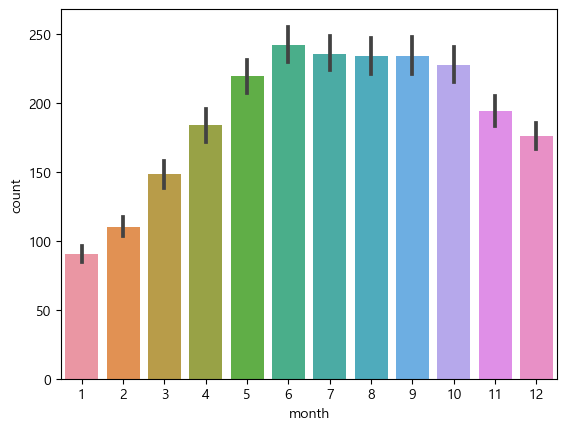

In [6]:
sns.barplot(data = bike, x = "month", y = "count")

<AxesSubplot:xlabel='season', ylabel='count'>

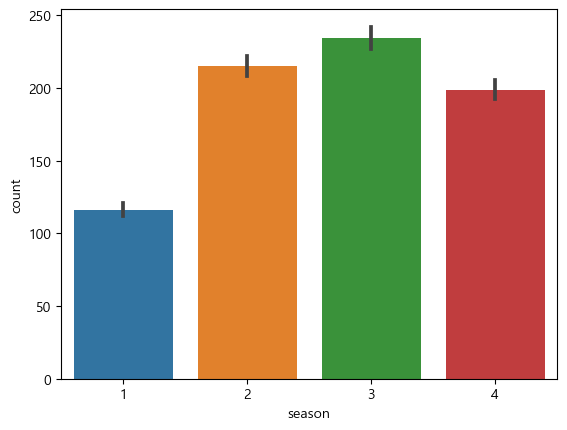

In [7]:
sns.barplot(data = bike, x = "season", y = "count")

### 2-2. 계절(1,2,3,4)를 봄, 여름, 가을, 겨울로 바꿔서 나타내기

<AxesSubplot:xlabel='season', ylabel='count'>

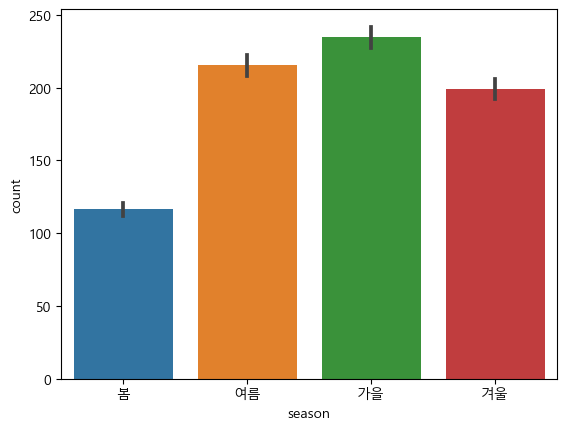

In [8]:
season_str = bike.season.replace(1, "봄").replace(2, "여름").replace(3, "가을").replace(4, "겨울")
bike.season = season_str

sns.barplot(data = bike, x = "season", y = "count")

### 2-3. 원하는 기준()을 잡고 시간대별로 pointplot 그리기

<AxesSubplot:xlabel='hour', ylabel='count'>

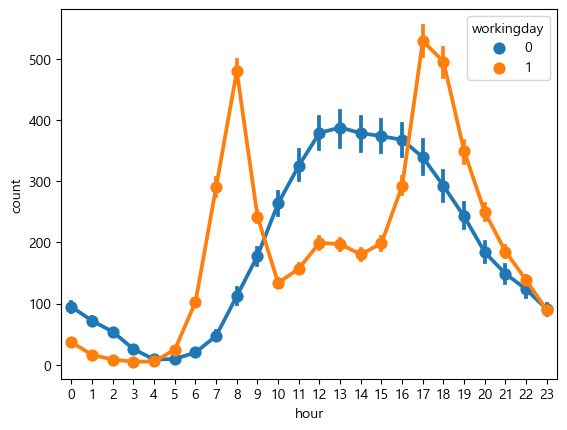

In [9]:
sns.pointplot(data = bike, x = "hour", y = "count", hue="workingday")
# sns.pointplot(data = bike, x = "hour", y = "count", hue="holiday")
# sns.pointplot(data = bike, x = "hour", y = "count", hue="season")


## 3. 한번에 그래프 출력 & scatterplot
- 온도, 습도, 바람세기

<AxesSubplot:xlabel='humidity', ylabel='count'>

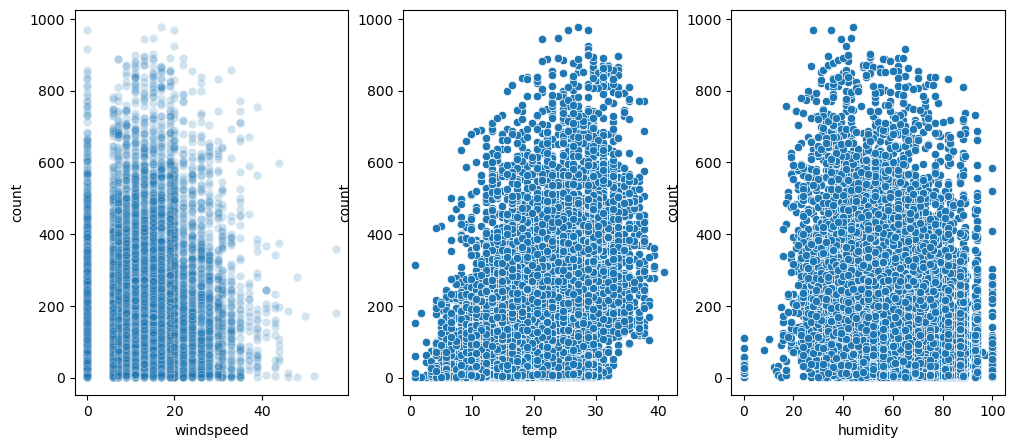

In [48]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols = 3, #컬럼이 총 3개, 행은 자동으로 1이 됨
                                   figsize = (12, 5))

sns.scatterplot(data=bike
                , x = "windspeed"
                , y = "count"
                , ax=ax1
                , alpha = 0.2) #투명도
sns.scatterplot(data=bike, x = "temp", y = "count", ax=ax2)
sns.scatterplot(data=bike, x = "humidity", y = "count", ax=ax3)

In [11]:
len(bike[bike.windspeed == 0])

1313

## 4. 그래프 그려서 이상치 확인하기
- temp, windspeed, humidity 각각 boxplot그리기
- 단, 3개가 한번에 

<AxesSubplot:xlabel='humidity'>

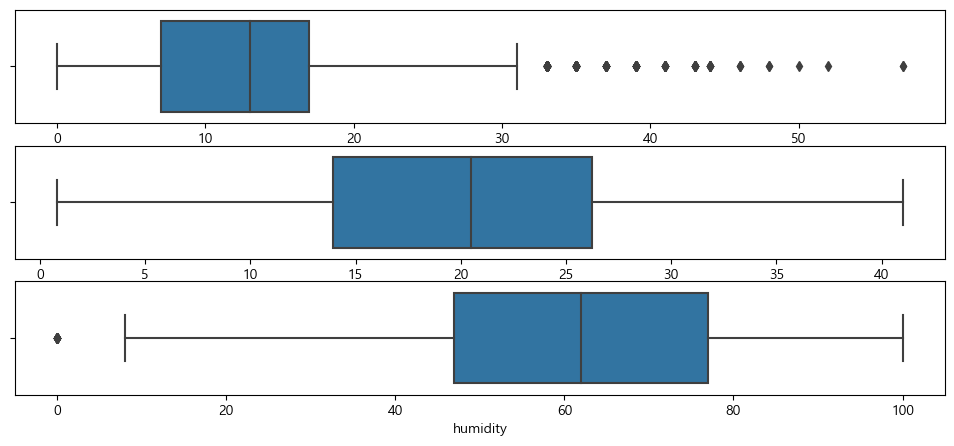

In [12]:
fig, (ax1, ax2, ax3) = plt.subplots(
                                    # ncols = 3,  #컬럼이 총 3개, 행은 자동으로 1이 됨
                                    nrows = 3, 
                                    figsize = (12, 5))

sns.boxplot(data=bike, x = "windspeed", ax=ax1)
sns.boxplot(data=bike, x = "temp",  ax=ax2)
sns.boxplot(data=bike, x = "humidity",  ax=ax3)
# sns.boxplot(data=bike, x = "atemp", y = "count", ax=ax4)
# sns.boxplot(data=bike, x = "season", y = "count", ax=ax5)
# sns.boxplot(data=bike, x = "weather", y = "count", ax=ax6)

# bike[bike.windspeed == 0.0]

# SUV_Data

In [13]:
suv = pd.read_csv("suv.csv", encoding = "EUC-KR")
suv.head(5)
# suv.info()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


## 1. 결측값을 제외하고 0,1로 구성된 더미값을 만들어줌 
- pd.get_dummies(데이터프레임, columns = ["원하는 컬럼"]) 

### nan를 생성 → 결측값도 인코딩해서 처리해줌
- dummy_na = True

In [14]:
suv2 = pd.get_dummies(suv, columns=["Gender"])
suv2.head()

,User ID,Age,EstimatedSalary,Purchased,Gender_Female,Gender_Male
0,15624510,19,19000,0,0,1
1,15810944,35,20000,0,0,1
2,15668575,26,43000,0,1,0
3,15603246,27,57000,0,1,0
4,15804002,19,76000,0,0,1


### age변수 분포 확인

c:\Users\user\anaconda3_\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

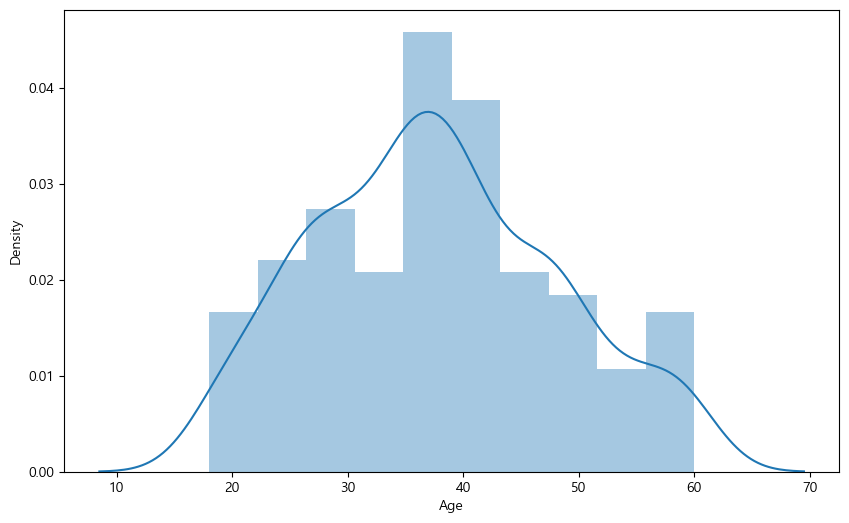

In [15]:
f, ax = plt.subplots(figsize = (10,6))
sns.distplot(suv2.Age)

# Titanic_Data

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import  font_manager, rc
import seaborn as sns #시각화를 쉽게 만들어줌

rc('font',family=font_name)
from matplotlib.pylab import rcParams

rcParams['font.family']='AppleGothic' #malgul gothic
rcParams['figure.figsize']=17,8
import warnings
warnings.filterwarnings('ignore')

In [17]:
titanic = pd.read_csv("titanic.csv", index_col=0)
titanic.head()
# suv.info()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [18]:
titanic.shape

(891, 11)

## 1. 기준 컬럼별 생존자수(0,1)를 count해주는 plot그리기 

<AxesSubplot:xlabel='Embarked', ylabel='count'>

findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans.


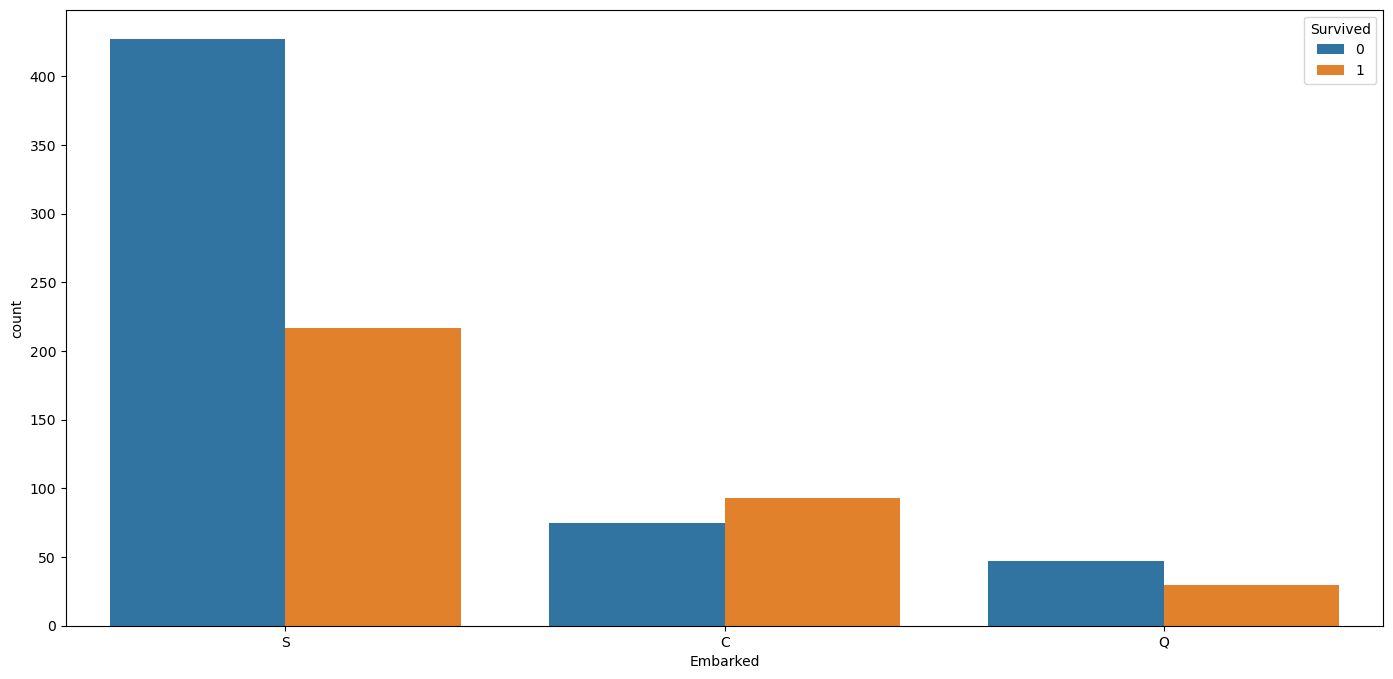

In [19]:
sns.countplot(data=titanic, 
              x="Embarked", 
            #   y = "count",
              hue = "Survived")

## 2. Embarked컬럼에서 결측치가 있는 데이터만 뽑아서 확인하기

In [20]:
titanic[titanic.Embarked.isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


## 3. Embarked값이 S인 데이터 확인하기

In [21]:
titanic[titanic.Embarked == "S"]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
...,...,...,...,...,...,...,...,...,...,...,...
884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S


In [22]:
## 4.null값인 데이터 S로 바꿔주기

In [23]:
#정답
titanic.loc[titanic.Embarked.isnull(), "Embarked"] = "S" #방법1
titanic.Embarked = titanic.Embarked.fillna("S") #방법2
titanic[titanic.Embarked.isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,


## 5.각각 승선 위치마다 승객이 몇 명 탔는지 %로 나타내기

In [24]:
np.ceil((titanic.Embarked.value_counts() / titanic.Embarked.count()) * 10000)/100 

S    72.51
C    18.86
Q     8.65
Name: Embarked, dtype: float64

#### 총원을 구하는 방법2

In [25]:
titanic.shape[0]
titanic.Embarked.count()

891

In [26]:
# titanic.groupby("Embarked")["Parch"].sum()

## 6. 성별에 따라 사람들이 얼마나 생존했는지 시각화하기

<AxesSubplot:xlabel='Sex', ylabel='count'>

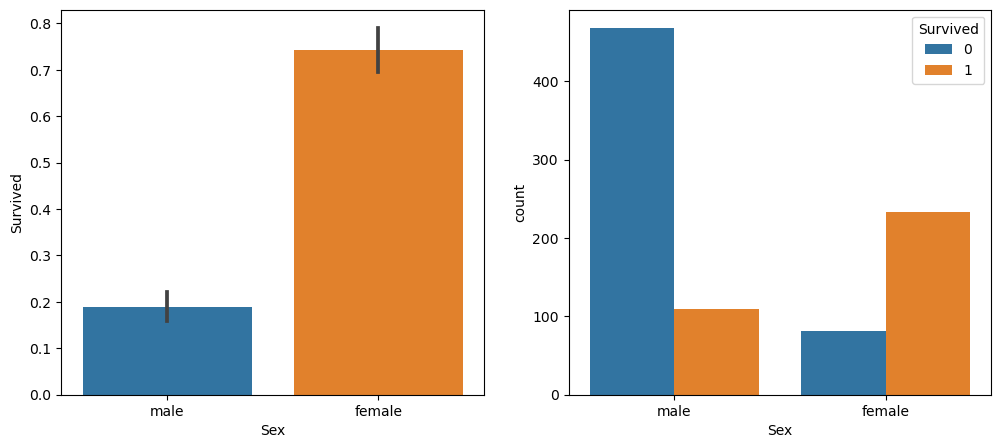

In [27]:
fig, (ax1, ax2) = plt.subplots(
                                    ncols = 2,  #컬럼이 총 3개, 행은 자동으로 1이 됨
                                    # nrows = 2, 
                                    figsize = (12, 5))

sns.barplot(data=titanic, x = "Sex",y = "Survived", ax=ax1)
sns.countplot(data=titanic, x = "Sex", hue="Survived",  ax=ax2)

<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

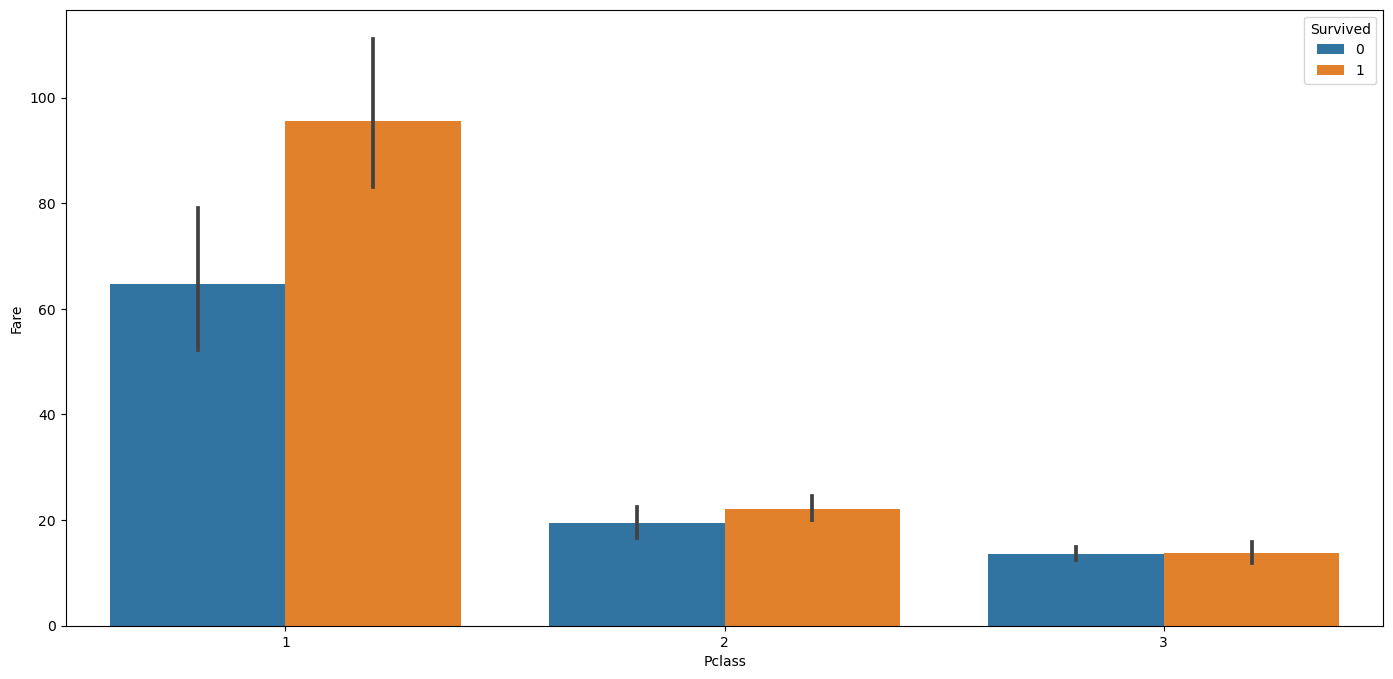

In [28]:
sns.barplot(data=titanic, x="Pclass", y="Fare", hue="Survived")

## 7. 요금이 500불 이상인 사람의 데이터 추출

In [29]:
titanic[titanic.Fare >= 500]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C


In [30]:
# up500 = titanic[titanic.Fare >= 500] 
# up500.Fare = up500.Fare/3
# up500
# 	512.3292	

## 9. 생존자/비생존자의 요금에 대한 displot 그리기

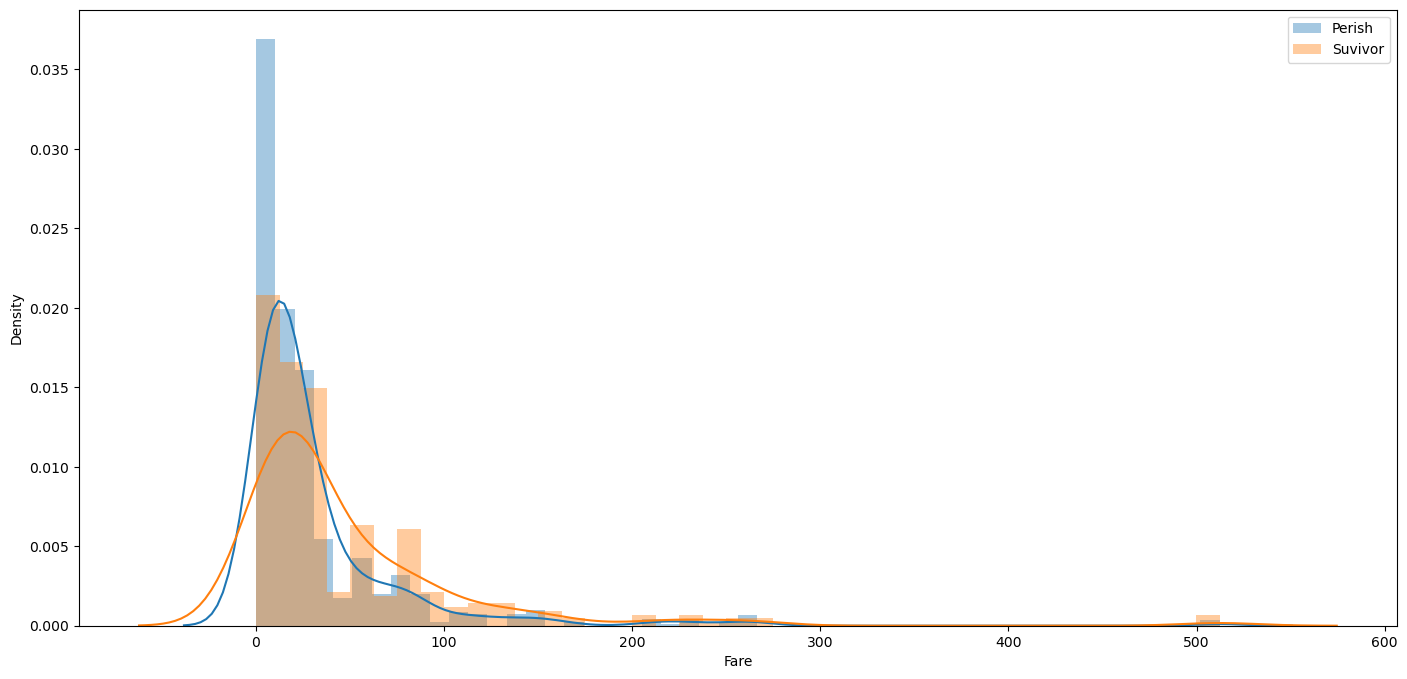

In [32]:
Perish = titanic[titanic.Survived == 0]
Suvivor = titanic[titanic.Survived == 1]

sns.distplot(titanic.Fare, label = "Perish")
sns.distplot(Suvivor.Fare, label = "Suvivor") 
plt.legend()

## 10. lmplot

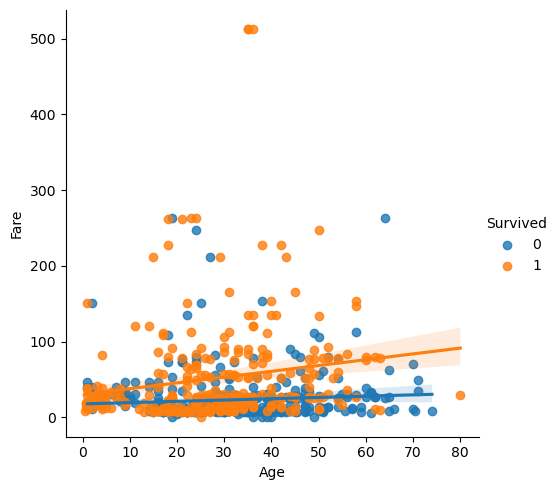

In [33]:
sns.lmplot(data = titanic, x = "Age", y = "Fare", hue = "Survived")

## 11. 아래 결과 도출하기
![dsa](https://user-images.githubusercontent.com/87592790/192182677-1fda24cd-05b9-4537-bbbc-bf227fcd57eb.png)


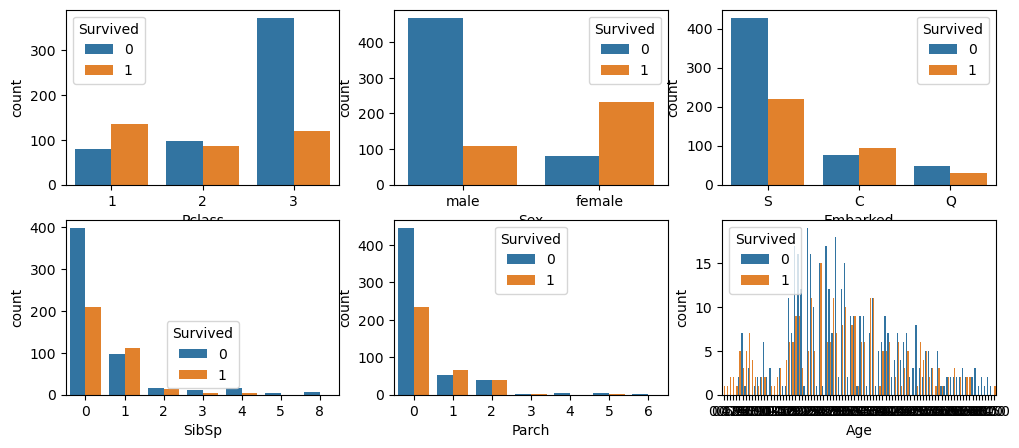

In [34]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(
                                    ncols = 3,  #컬럼이 총 3개, 행은 자동으로 1이 됨
                                    nrows = 2, 
                                    figsize = (12, 5))

sns.countplot(data=titanic, x = "Pclass", hue="Survived", ax=ax1)
sns.countplot(data=titanic, x = "Sex", hue="Survived", ax=ax2)
sns.countplot(data=titanic, x = "Embarked", hue="Survived", ax=ax3)
sns.countplot(data=titanic, x = "SibSp", hue="Survived",ax=ax4)
sns.countplot(data=titanic, x = "Parch", hue="Survived",ax=ax5)
sns.countplot(data=titanic, x = "Age", hue="Survived",ax=ax6)

plt.savefig('titanic.pdf')

## 12. Family_size = SibSp + Parch

In [36]:
Family_size = titanic.SibSp + titanic.Parch
titanic.insert(loc=5, column="Family_size", value= Family_size)
titanic

,Survived,Pclass,Name,Sex,Age,Family_size,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,3,1,2,W./C. 6607,23.4500,NaN,S


In [38]:

titanic.drop(columns=["SibSp", "Parch", "Family_size"])

,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,W./C. 6607,23.4500,NaN,S


## 13. Family_size의 값을 기준으로 Alone인지 아닌지 확인해주고 싶음
- 열 이름은 Alone으로 설정
- value = 0 이면 1로 바꾸기
- value 가 0이 아니면 0으로 바꾸기

In [39]:
titanic.loc[titanic.Family_size == 0, "Alone"] = 1
titanic.loc[titanic.Family_size != 0, "Alone"] = 0
titanic.head()

,Survived,Pclass,Name,Sex,Age,Family_size,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Alone
PassengerId,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,1,0,A/5 21171,7.2500,NaN,S,0.0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,1,0,PC 17599,71.2833,C85,C,0.0
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,1,0,113803,53.1000,C123,S,0.0
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,0,373450,8.0500,NaN,S,1.0


In [ ]:
## 14. 

<AxesSubplot:xlabel='Family_size', ylabel='count'>

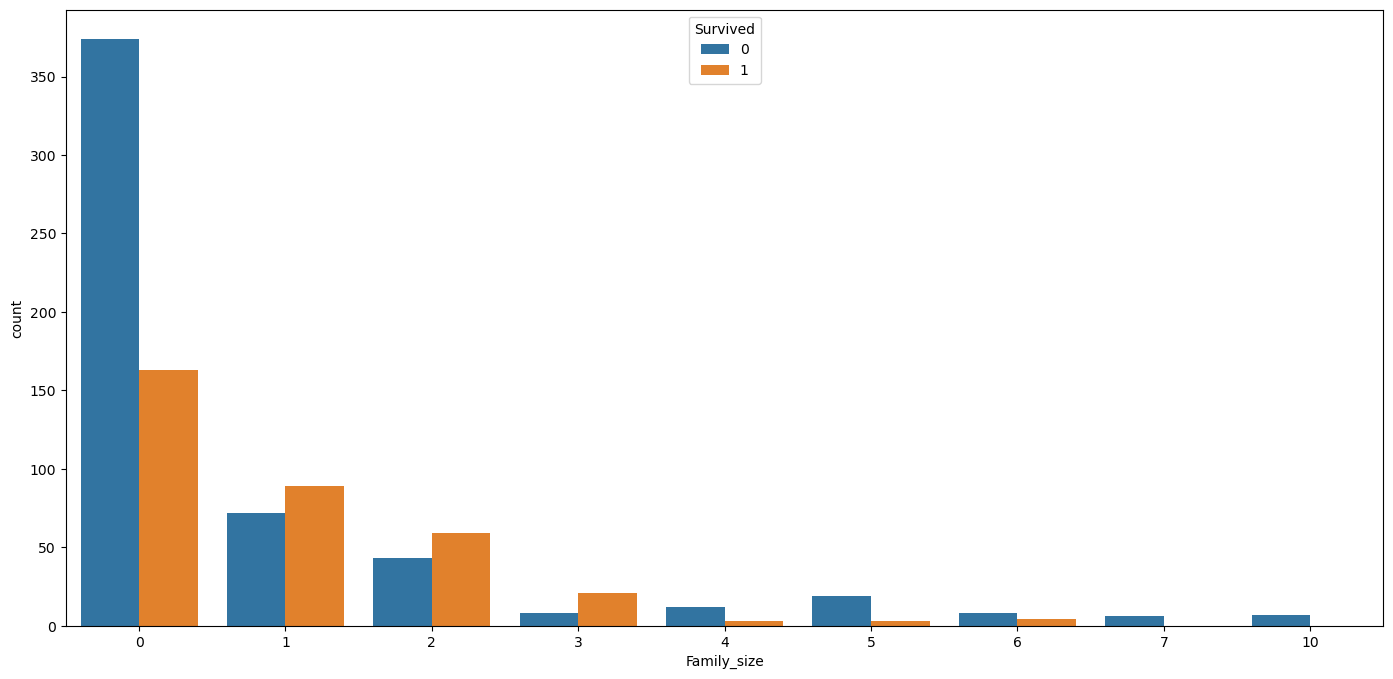

In [40]:
sns.countplot(data = titanic, x="Family_size", hue="Survived")